In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# Import data

In [2]:
df=pd.read_csv("/Users/raphaelletoubiana/Desktop/Harvard/CS109A/project/df_final_15_predictors.csv")

In [4]:
df.tail()

,popular_vote_percentage,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff
35,47.20,-0.035400,0.085630,-0.472306,-9.395652,0.010417,0.161177,0.057881,1.0,0,7.13,0.8649,23.9,982.980010,94869.629
36,46.09,0.250092,0.115664,-24.363123,-5.676494,0.032886,0.263929,0.072054,-1.0,0,7.68,0.8853,27.5,845.412267,103491.911
37,48.18,0.250092,0.115664,-24.363123,-5.676494,0.032886,0.229380,0.072054,-1.0,1,7.68,0.8853,27.5,936.224151,103491.911
38,47.40,0.559690,-0.810255,-14.658748,-1.571033,-0.112869,0.138836,0.071533,1.0,0,6.71,0.6600,22.9,897.398750,113749.155
39,50.80,0.559690,-0.810255,-14.658748,-1.571033,-0.112869,0.116536,0.071533,1.0,1,6.71,0.6600,22.9,1075.228069,113749.155


# Transform data

In [17]:
X_train=df.iloc[:len(df)-2].drop(["popular_vote_percentage"], axis=1)
y_train=df.iloc[:len(df)-2]["popular_vote_percentage"]

X_test=df.iloc[len(df)-2:].drop(["popular_vote_percentage"], axis=1)
y_test=df.iloc[len(df)-2:]["popular_vote_percentage"]

In [18]:
display(X_train.head())
display(X_test)

,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff
0,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1,9.32,0.0854,5.6,892.5,12542.043
1,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1,8.68,0.6699,28.2,993.0,18721.174
2,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.272868,0.118448,-1.0,0,9.32,0.0854,5.6,892.5,12542.043
3,0.160119,0.088772,-9.402052,4.957343,-0.034111,0.272868,0.118448,-1.0,0,8.68,0.6699,28.2,993.0,18721.174
4,0.825641,0.234242,-9.718823,-1.423503,0.031317,0.377789,-0.089281,0.0,0,9.32,0.0854,5.6,1038.5,12542.043


,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff
38,0.55969,-0.810255,-14.658748,-1.571033,-0.112869,0.138836,0.071533,1.0,0,6.71,0.66,22.9,897.398750,113749.155
39,0.55969,-0.810255,-14.658748,-1.571033,-0.112869,0.116536,0.071533,1.0,1,6.71,0.66,22.9,1075.228069,113749.155


In [19]:
df.iloc[len(df)-2:]["Democrat_Republican"]

38    0
39    1
Name: Democrat_Republican, dtype: int64

## Scaler

In [20]:
colnames=X_train.keys().tolist()[:7]+X_train.keys().tolist()[9:]
scale_Standard=StandardScaler().fit(X_train[colnames])
X_train_scaled = pd.DataFrame(scale_Standard.transform(X_train[colnames]), columns=[colnames])
X_test_scaled = pd.DataFrame(scale_Standard.transform(X_test[colnames]), columns=[colnames])

In [21]:
X_train_scaled["state_election"] = df.iloc[:len(df)-2]["state_election"]
X_test_scaled["state_election"] = [1.0, 1.0]

X_train_scaled["Democrat_Republican"] = df.iloc[:len(df)-2]["Democrat_Republican"]
X_test_scaled["Democrat_Republican"] = [0,1]

In [22]:
display(X_train_scaled.head())
display(X_test_scaled)

,NAP,payroll,stock,rdi,election,national_polls,gdp,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff,state_election,Democrat_Republican
0,2.286111,1.430847,-0.211361,-0.475242,-0.196043,1.852562,-2.520602,0.917870,-1.17432,-2.096502,-0.362495,-1.170073,0.0,1
1,2.286111,1.430847,-0.211361,-0.475242,-0.196043,1.852562,-2.520602,0.561051,-0.22507,-0.331676,0.335023,-0.960599,0.0,1
2,0.023187,-0.599966,-0.189361,0.733166,-1.771777,-0.055224,0.387658,0.917870,-1.17432,-2.096502,-0.362495,-1.170073,-1.0,0
3,0.023187,-0.599966,-0.189361,0.733166,-1.771777,-0.055224,0.387658,0.561051,-0.22507,-0.331676,0.335023,-0.960599,-1.0,0
4,2.286111,1.430847,-0.211361,-0.475242,-0.196043,0.191695,-2.520602,0.917870,-1.17432,-2.096502,0.650815,-1.170073,0.0,0


,NAP,payroll,stock,rdi,election,national_polls,gdp,NAP_weighted_diff,stock_weighted_diff,rdi_weighted_diff,national_polls_weighted_diff,gdp_weighted_diff,state_election,Democrat_Republican
0,1.381817,-13.150737,-0.554447,-0.503182,-3.668521,-0.37065,-0.269166,-0.537282,-0.241148,-0.745551,-0.328495,2.260882,1.0,0
1,1.381817,-13.150737,-0.554447,-0.503182,-3.668521,-0.42313,-0.269166,-0.537282,-0.241148,-0.745551,0.905725,2.260882,1.0,1


# Lasso CV

In [24]:
alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_cv = LassoCV(cv=2, alphas=alphas)
lasso_cv.fit(X_train_scaled, y_train)

y_pred_test = lasso_cv.predict(X_test_scaled)
y_pred_train = lasso_cv.predict(X_train_scaled)

val_mse=lasso_cv.mse_path_.mean(axis=1)

'''scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 7 scaled PCs, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results'''

/Users/raphaelletoubiana/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.112928294004178, tolerance: 0.08434441684210525
  tol, rng, random, positive)


"scores.append([mse, y_pred_test[0], y_pred_test[1]])\nnames.append('Lasso regression with 7 scaled PCs, cv=2')\ndf_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])\ndf_results"

In [25]:
lasso_cv.coef_

array([-0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        4.26184719, -0.        , -0.        , -0.        ])

With this dataframe, I think we should consistently follow the same steps:
- Begin with LassoCV and spot the features that are killed by the best model. Create a new_df called Lasso_df
- Perform PCA on the scaled df and select the number of PCs you want to work with. Create  a new df called PCA_df. 
- Now, you have 3 df each you want to play around with. 
- On everyone of these 3 df, you should try the models: Linear Regression, Lasso Reg, kNN Regression, Tree Based models (SimpleTrees, RF). I think RF will be the best. Do not forget to perform cross-validation for hyperparameter tuning and we should be consistent with the scoring metrics and use mse.

# PCA

Text(0, 0.5, 'PCA Dimention 2')

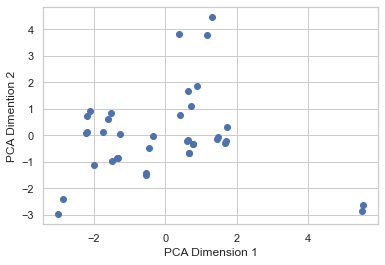

In [26]:
pca_transformer = PCA().fit(X_train_scaled)
X_train_pca = pca_transformer.transform(X_train_scaled)
X_test_pca = pca_transformer.transform(X_test_scaled)
# notice that we set up lists to track each group's plotting color and label
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])

# all plots need labels
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")

Text(0.5, 1.0, 'Weights of features in the 2 first PCs')

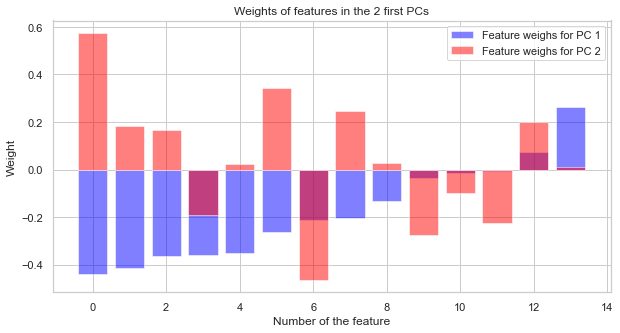

In [28]:
feature_weights_0=pca_transformer.components_[0]
feature_weights_1=pca_transformer.components_[1]
x=np.asarray(range(len(feature_weights_0)))
idx = np.argsort(feature_weights_0)

feature_weights_0 = feature_weights_0[idx]

plt.figure(figsize=(10,5))
plt.bar(range(len(feature_weights_0)),feature_weights_0, color='blue', alpha=0.5, label='Feature weighs for PC 1')
plt.bar(range(len(feature_weights_0)),feature_weights_1, color='red', alpha=0.5, label='Feature weighs for PC 2')
plt.xlabel('Number of the feature')
plt.ylabel('Weight')
plt.legend()
plt.title("Weights of features in the 2 first PCs")

In [33]:
var_explained = pca_transformer.explained_variance_ratio_
print("Variance explained by the 2 first PCA components is:", round(var_explained[0]+var_explained[1],2))

Variance explained by the 2 first PCA components is: 0.48


In [34]:
max=0.9
sum=0
i=0
while sum < max:
    sum+=var_explained[i]
    i+=1
print('The number of PCA vectors needed so that 90% of the variability in the predictors is explained is:', i)

The number of PCA vectors needed so that 90% of the variability in the predictors is explained is: 8


Text(0.5, 1.0, 'Cumulative explained variability against the number of PCA components used ')

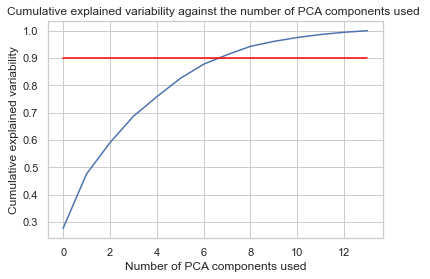

In [35]:
number_pca=[i for i in range(len(var_explained))]
cumulative_var_explained=[]
s=0
for i in range(len(var_explained)):
    s+=var_explained[i]
    cumulative_var_explained.append(s)

line=[0.9 for i in range(len(var_explained))]

plt.plot(number_pca,cumulative_var_explained, label='Explained variance')
plt.plot(number_pca,line, color='red', label='90% explained variance')
plt.xlabel('Number of PCA components used')
plt.ylabel('Cumulative explained variability')
plt.title('Cumulative explained variability against the number of PCA components used ')

We will test 3 number of PCs:
- 2 that explain 61% of the variance
- 8 that explain 90% of the variance

# Models

In [38]:
x_2=X_train_pca[:,0:2]
x_8=X_train_pca[:,0:8]

x_2_test=X_test_pca[:,0:2]
x_8_test=X_test_pca[:,0:8]

## Linear regression

### With 2 PCs

In [45]:
lin_2 = LinearRegression()
lin_2.fit(x_2, y_train)

y_pred_test = lin_2.predict(x_2_test) 
y_pred_train = lin_2.predict(x_2) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores = [[mse, y_pred_test[0], y_pred_test[1]]]
names = ['Simple linear regression with 2 scaled PCs']
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588


### With 8 PCs

In [46]:
lin_8 = LinearRegression()
lin_8.fit(x_8, y_train)

y_pred_test = lin_8.predict(x_8_test) 
y_pred_train = lin_8.predict(x_8) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Simple linear regression with 8 scaled PCs')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588
Simple linear regression with 8 scaled PCs,6.995664,43.522513,48.376796


## Lasso regularization

### With 2 PCs

In [47]:
lasso_reg_2 = Lasso(alpha=0.1, normalize=True)
lasso_reg_2.fit(x_2, y_train)

y_pred_test = lasso_reg_2.predict(x_2_test)
y_pred_train = lasso_reg_2.predict(x_2)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 2 scaled PCs, alpha=0.01')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588
Simple linear regression with 8 scaled PCs,6.995664,43.522513,48.376796
"Lasso regression with 2 scaled PCs, alpha=0.01",33.285789,48.139750,48.212818


In [48]:
from sklearn.linear_model import LassoCV

alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg_2 = LassoCV(cv=2, alphas=alphas)
lasso_reg_2.fit(x_2, y_train)

y_pred_test = lasso_reg_2.predict(x_2_test)
y_pred_train = lasso_reg_2.predict(x_2)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 2 scaled PCs, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588
Simple linear regression with 8 scaled PCs,6.995664,43.522513,48.376796
"Lasso regression with 2 scaled PCs, alpha=0.01",33.285789,48.139750,48.212818
"Lasso regression with 2 scaled PCs, cv=2",33.284793,48.103322,48.176621


In [50]:
lasso_reg_2.alpha_

0.1

### With 8 PCs

In [51]:
lasso_reg_8 = Lasso(alpha=0.1, normalize=True)
lasso_reg_8.fit(x_8, y_train)

y_pred_test = lasso_reg_8.predict(x_8_test) 
y_pred_train = lasso_reg_8.predict(x_8) 

#Compute the MSE
mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 8 scaled PCs, alpha=0.1')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588
Simple linear regression with 8 scaled PCs,6.995664,43.522513,48.376796
"Lasso regression with 2 scaled PCs, alpha=0.01",33.285789,48.139750,48.212818
"Lasso regression with 2 scaled PCs, cv=2",33.284793,48.103322,48.176621
"Lasso regression with 8 scaled PCs, alpha=0.1",8.958337,46.805599,50.664111


In [53]:
alphas=[0.001,0.01, 0.1, 1, 10, 100]

lasso_reg_8 = LassoCV(cv=2, alphas=alphas)
lasso_reg_8.fit(x_8, y_train)

y_pred_test = lasso_reg_8.predict(x_8_test)
y_pred_train = lasso_reg_8.predict(x_8)

mse = mean_squared_error(y_train, y_pred_train)

scores.append([mse, y_pred_test[0], y_pred_test[1]])
names.append('Lasso regression with 8 scaled PCs, cv=2')
df_results = pd.DataFrame(scores, index=names, columns=['MSE', 'Prediction for Trump', 'Prediction for Biden'])
df_results

,MSE,Prediction for Trump,Prediction for Biden
Simple linear regression with 2 scaled PCs,33.278189,47.969881,48.049588
Simple linear regression with 8 scaled PCs,6.995664,43.522513,48.376796
"Lasso regression with 2 scaled PCs, alpha=0.01",33.285789,48.139750,48.212818
"Lasso regression with 2 scaled PCs, cv=2",33.284793,48.103322,48.176621
"Lasso regression with 8 scaled PCs, alpha=0.1",8.958337,46.805599,50.664111
"Lasso regression with 8 scaled PCs, cv=2",12.129266,46.365773,49.611230


## Knn regression

### With 2 PCs

### With 8 PCs

## Decision tree classifier

### With 2 PCs

### With 8 PCs

## Random forest

### With 2 PCs

### With 8 PCs